# Analysis of Airbnb bookings across Seattle

In this project, I will try to analyse and answer a few questions on the airbnb seattle dataset available on kaggle. This implementation is following CRISP-DM process i.e., the project is organized in the following steps,

1. Business understanding
2. Data Understanding
3. Preperation of the data
4. Modelling (If Necessary)
5. Evaluation of the results
6. Conclusion

The questions that would be answered in this project are listed as follows,
1. Predicting the suitable price based on the features of the room {property_type, room_type, no.of bedrooms, no. of bathrooms etc.}?
2. What is the probable price for a room based on the neighbourhood?
3. Which type of properties are common in each neighbourhood?
4. What is the effect of selecting "Strict" cancellation policy on the frequency of bookings?
5. What is the neighbourhood where the price is highest despite providing minimum amenities?

In [303]:
import pandas as pd
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


warnings.filterwarnings('ignore')

pio.templates.default = "plotly_white"

listings = pd.read_csv('./Data/listings.csv')
calendar = pd.read_csv('./Data/calendar.csv')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [304]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [305]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


Among the plethora of columns, we will first try and select the columns which are relavent for our question.

# Processing the Data

Since the data is presented in a straight forward way, we can directly skip to the step where we prepare the data to answer our questions. This step is said to take a relatively long time to finish, as there are a lot of aspects that needs to be focused on. 

For our project, we will generally be working with aggregations, hence the 2 aspects the important aspects that we need to make sure is to
- make sure that there are no null values.
- After that, we need to check for any outlier, and try to exclude them from the data. 
- Finally before sending it for the next step i.e., modelling, we need to process all the categorical variables into their respective types. 

Since most of the questions can be answered after procesing the outliers, the final step is done before answering the last question, i.e., the question which requires us to be able to predict from the data available.

In [306]:
relavent_columns = ['id','neighbourhood_group_cleansed', 'property_type',
                    'room_type', 'accommodates','bathrooms',
                    'square_feet', 'bedrooms', 'beds',
                    'bed_type', 'amenities', 'cancellation_policy',
                    'minimum_nights', 'instant_bookable', 'review_scores_rating',
                    'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin',
                    'review_scores_communication','review_scores_location', 'review_scores_value',
                    'price']

listings_new = listings[relavent_columns]

In [307]:
listings_new.head()

,id,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,square_feet,bedrooms,beds,bed_type,amenities,cancellation_policy,minimum_nights,instant_bookable,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,241032,Queen Anne,Apartment,Entire home/apt,4,1.0,NaN,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,1,f,95.0,10.0,10.0,10.0,10.0,9.0,10.0,$85.00
1,953595,Queen Anne,Apartment,Entire home/apt,4,1.0,NaN,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,2,f,96.0,10.0,10.0,10.0,10.0,10.0,10.0,$150.00
2,3308979,Queen Anne,House,Entire home/apt,11,4.5,NaN,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,4,f,97.0,10.0,10.0,10.0,10.0,10.0,10.0,$975.00
3,7421966,Queen Anne,Apartment,Entire home/apt,3,1.0,NaN,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",flexible,1,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$100.00
4,278830,Queen Anne,House,Entire home/apt,6,2.0,NaN,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,1,f,92.0,9.0,9.0,10.0,10.0,9.0,9.0,$450.00


Now, it is time to reformat the price.

In [308]:
listings_new.loc[:,"price"] = listings_new.price.str.replace("[$, ]", "", regex=True).astype("float")

In [309]:
listings_new.head()

,id,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,square_feet,bedrooms,beds,bed_type,amenities,cancellation_policy,minimum_nights,instant_bookable,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,241032,Queen Anne,Apartment,Entire home/apt,4,1.0,NaN,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,1,f,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85.0
1,953595,Queen Anne,Apartment,Entire home/apt,4,1.0,NaN,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,2,f,96.0,10.0,10.0,10.0,10.0,10.0,10.0,150.0
2,3308979,Queen Anne,House,Entire home/apt,11,4.5,NaN,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,4,f,97.0,10.0,10.0,10.0,10.0,10.0,10.0,975.0
3,7421966,Queen Anne,Apartment,Entire home/apt,3,1.0,NaN,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",flexible,1,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
4,278830,Queen Anne,House,Entire home/apt,6,2.0,NaN,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,1,f,92.0,9.0,9.0,10.0,10.0,9.0,9.0,450.0


### Tackling the null values

In [310]:
100*listings_new.isnull().sum().sort_values(ascending=False)/listings_new.shape[0]

square_feet                     97.459403
review_scores_checkin           17.234154
review_scores_accuracy          17.234154
review_scores_value             17.181771
review_scores_location          17.155579
review_scores_cleanliness       17.103195
review_scores_communication     17.050812
review_scores_rating            16.946045
bathrooms                        0.419068
bedrooms                         0.157150
property_type                    0.026192
beds                             0.026192
id                               0.000000
cancellation_policy              0.000000
instant_bookable                 0.000000
minimum_nights                   0.000000
neighbourhood_group_cleansed     0.000000
amenities                        0.000000
bed_type                         0.000000
accommodates                     0.000000
room_type                        0.000000
price                            0.000000
dtype: float64

The information of squarefeet is not provided in most of the listings, hence we can assume that this information has very little effect on the other parameters. Hence, we can drop them.  However, the reviews cannot be dealt in the same way, As, we have the values for most of the listings, but for the entries which donot have any entries in the related field. 

In [311]:
listings_new.drop('square_feet', axis=1, inplace=True)
listings_new.dtypes

id                                int64
neighbourhood_group_cleansed     object
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
bed_type                         object
amenities                        object
cancellation_policy              object
minimum_nights                    int64
instant_bookable                 object
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64
price                           float64
dtype: object

In [312]:
review_cols = [x for x in listings_new.columns if 'review' in x]

listings_new[review_cols].describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000
mean,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245
std,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259
min,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000
25%,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


It is assumed that the values at 50th percentile, could be considered a good value to be added in the place values for null values.

In [313]:
percentile50 = listings_new[review_cols].quantile(0.5)
listings_new.loc[:,review_cols]=listings_new[review_cols].fillna(percentile50)

In [314]:
listings_new.isnull().sum().sort_values(ascending=False)

bathrooms                       16
bedrooms                         6
property_type                    1
beds                             1
id                               0
review_scores_rating             0
review_scores_value              0
review_scores_location           0
review_scores_communication      0
review_scores_checkin            0
review_scores_cleanliness        0
review_scores_accuracy           0
cancellation_policy              0
instant_bookable                 0
minimum_nights                   0
neighbourhood_group_cleansed     0
amenities                        0
bed_type                         0
accommodates                     0
room_type                        0
price                            0
dtype: int64

Now it is time to deal with the null values which are quantitative. 

In [315]:
listings_new.loc[:,['bathrooms','bedrooms','beds']] = listings_new.loc[:,['bathrooms','bedrooms','beds']].fillna(listings_new.loc[:,['bathrooms','bedrooms','beds']].quantile(0.50))

For the property type, let us check if there is a way we can infer the property_type from the room_type.

In [316]:
listings_new[listings_new.property_type.isnull()]

,id,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,cancellation_policy,minimum_nights,instant_bookable,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
2184,3335,Rainier Valley,NaN,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",strict,2,f,96.0,10.0,10.0,10.0,10.0,10.0,10.0,120.0


Based on the room_type, we can say that the property_type is apartment. 

In [317]:
listings_new.iloc[2184, 2] = "Apartment"

In [318]:
listings_new.isnull().sum().sort_values(ascending=False)

id                              0
minimum_nights                  0
review_scores_value             0
review_scores_location          0
review_scores_communication     0
review_scores_checkin           0
review_scores_cleanliness       0
review_scores_accuracy          0
review_scores_rating            0
instant_bookable                0
cancellation_policy             0
neighbourhood_group_cleansed    0
amenities                       0
bed_type                        0
beds                            0
bedrooms                        0
bathrooms                       0
accommodates                    0
room_type                       0
property_type                   0
price                           0
dtype: int64

### Checking for outliers.

To check for the outliers we try to use the pre-defined `.describe()` method. or we can use graphs. In this case, I will be using the `describe()` method.

In [319]:
#For Reference...
listings_new.head(2)

,id,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,cancellation_policy,minimum_nights,instant_bookable,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,241032,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,1,f,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85.0
1,953595,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,2,f,96.0,10.0,10.0,10.0,10.0,10.0,10.0,150.0


In [320]:
quant_features = listings_new[['accommodates','bathrooms', 'bedrooms',
             'beds','minimum_nights','review_scores_rating',
             'review_scores_accuracy',	'review_scores_cleanliness','review_scores_checkin',
             'review_scores_communication', 'review_scores_location','review_scores_value']]
description = quant_features.describe()

#computing higher quantiles for better information
higher_quantiles = quant_features.quantile([0.9,0.99,0.999]).rename(index={0.9:'90%',0.99:'99%',0.999:'99.9%'})

#Combining all the dataframes to get a complete description
description = pd.concat([description, higher_quantiles])

In [321]:
description.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', '90%', '99%',
       '99.9%'],
      dtype='object')

In [322]:
description.loc[['min','mean', 'max','25%','50%', '75%','90%', '99%','99.9%'],:]

,accommodates,bathrooms,bedrooms,beds,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
min,1.000000,0.000000,0.000000,1.000000,1.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000
mean,3.349398,1.258381,1.307229,1.735202,2.369303,94.786799,9.699057,9.632268,9.823468,9.842064,9.676008,9.546359
max,16.000000,8.000000,7.000000,15.000000,1000.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,3.000000,1.000000,1.000000,1.000000,2.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,4.000000,1.000000,2.000000,2.000000,2.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
90%,6.000000,2.000000,3.000000,3.000000,3.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
99%,10.000000,3.500000,4.000000,6.000000,14.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
99.9%,15.183000,4.591500,6.000000,9.000000,30.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


We can identify the outliers and remove them, by observing the difference between the mean and the min/max values. The other rows of the quantiles are just to get additional information.

From the above description, the following can be stated to be outliers:
* In the fields that contain the parameters regarding the room {accommodates, bathrooms, bedrooms, minimum nights} The outliers are those which have very high requirements.
* In the fields that describe the reviews, the ones which have low rating/scores, can be identified as outliers, as even the 25th quantile are having very high difference with the minimum values.

These can be figuratively represented using histograms, Boxplots, Scatterplots.

In [323]:
#boxplots
px.box(listings_new, y=['accommodates'])

So, any airbnb with accomodates more than 7 can be declared as outliers.

In [324]:
original_entries = listings_new.shape[0]
listings_new = listings_new[listings_new.accommodates<=7]
print(f'No. of excluded entries = {original_entries-listings_new.shape[0]}')

No. of excluded entries = 184


Since, the stays which require more than 7 accomodates are excluded, the other columns must also be automatically corrected. This has be done in the interest of maintaining the accommodates as similar to the general conditions as possible. Once we correct this parameter, the other parameters that describe the room would become subjective to the host, and would become necessary details, and cannot be further processed. 

In [325]:
quant_features_rooms = listings_new[['accommodates','bathrooms', 'bedrooms',
                                     'beds','minimum_nights']]
higher_quantiles = quant_features_rooms.quantile([0.9,0.99,0.999]).rename(index={0.9:'90%',0.99:'99%',0.999:'99.9%'})


pd.concat([quant_features_rooms.describe(), higher_quantiles])

,accommodates,bathrooms,bedrooms,beds,minimum_nights
count,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000
mean,3.059989,1.195239,1.194827,1.585581,2.365162
std,1.481970,0.489000,0.707411,0.862384,16.705579
min,1.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,1.000000,2.000000
75%,4.000000,1.000000,1.000000,2.000000,2.000000
max,7.000000,8.000000,5.000000,7.000000,1000.000000
90%,6.000000,2.000000,2.000000,3.000000,3.000000
99%,7.000000,3.000000,3.000000,4.000000,14.000000


Though the assumption was correct to certain extent, Let us look at the boxplots once again after correcting the minimum nights.

In [326]:
px.box(listings_new, y='minimum_nights')

By utilizing the advantages of plotly, we can zoom into the plot and find the upper fence, which is 3, but based on the context of the data, it is possible that a few of the hosts, require a minimum stay of a month, hence after taking that also into consideration the upper limit for minimum_nights is determined to be 31.
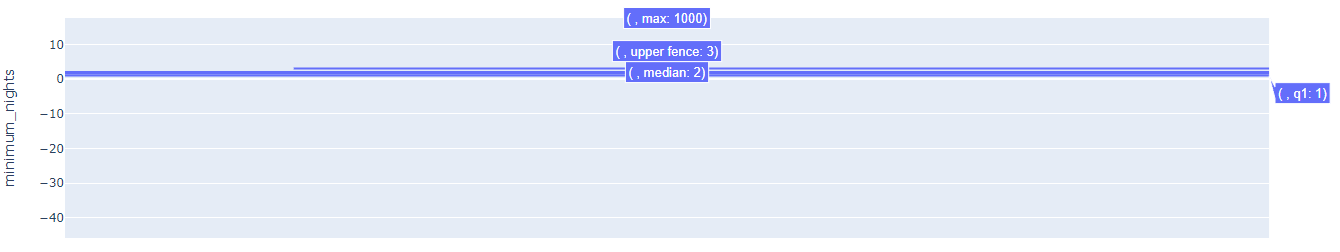

In [327]:
original_entries = listings_new.shape[0]
listings_new = listings_new[listings_new.minimum_nights<=31]
print(f'No. of excluded entries = {original_entries-listings_new.shape[0]}')

No. of excluded entries = 1


So, there was only 1 entry that was excluded, and the remaining values seem logical, as not all would like to let people stay for 1 or 2 days, and would prefer people who stay for a month.

Now, it is time to remove outliers from the **review** features.

In [328]:
quant_reviews = listings_new[['review_scores_rating','review_scores_accuracy',	
                              'review_scores_cleanliness','review_scores_checkin',
                              'review_scores_communication', 'review_scores_location',
                              'review_scores_value']]

#computing higher quantiles for better information
lower_quantiles = quant_reviews.quantile([0.1,0.01]).rename(index={0.1:'10%',0.01:'1%'})

#Combining all the dataframes to get a complete description
pd.concat([quant_reviews.describe(), lower_quantiles]).loc[['min','1%','10%','25%'],:]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
min,20.0,2.00,3.0,2.0,2.0,4.0,2.0
1%,72.0,7.32,6.0,8.0,8.0,8.0,7.0
10%,89.0,9.00,9.0,9.0,9.0,9.0,9.0
25%,94.0,10.00,9.0,10.0,10.0,9.0,9.0


From the above table, we can set the limit to be values at 1% quantile.

In [329]:
original_entries = listings_new.shape[0]
listings_new = listings_new[(listings_new.review_scores_rating>=72) & (listings_new.review_scores_accuracy>=7.32) &
                            (listings_new.review_scores_cleanliness>=6) & (listings_new.review_scores_checkin>=8) & 
                            (listings_new.review_scores_communication>=8) & (listings_new.review_scores_location>=8) &
                            (listings_new.review_scores_value>=7)]
print(f'No. of excluded entries = {original_entries-listings_new.shape[0]}')

No. of excluded entries = 98


Hence from the initial state to the final stage, a total of 283 entries were excluded so as to get a more general structure of the data. Now all that is left is to 
* Reset the index to get continuous values,
* Removing the excluded listings from the calendar dataframe 
* Answer the questions.

In [330]:
#Resetting the index
listings_new = listings_new.reset_index().drop('index',axis=1)

listings_new.shape

(3535, 21)

In [331]:
listings_new.head()

,id,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,cancellation_policy,minimum_nights,instant_bookable,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,241032,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,1,f,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85.0
1,953595,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,2,f,96.0,10.0,10.0,10.0,10.0,10.0,10.0,150.0
2,7421966,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",flexible,1,f,96.0,10.0,10.0,10.0,10.0,10.0,10.0,100.0
3,278830,Queen Anne,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,1,f,92.0,9.0,9.0,10.0,10.0,9.0,9.0,450.0
4,5956968,Queen Anne,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",strict,1,f,95.0,10.0,10.0,10.0,10.0,10.0,10.0,120.0


In [332]:
# Formatting the calendar dataframe.
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [333]:
valid_listings = listings_new.id.to_list()
calendar = calendar[calendar.listing_id.isin(valid_listings)]

In [334]:
calendar.listing_id.nunique()

3535

Now that the null values and the ouliers are dealt with, there is a small process that needs to be done before we can start answering the questions. Which is nothing but unpacking the amenities in the listings. Since we can also use this in the upcoming model, we are directly generating dummies for the amenities here itself.

In [335]:
listings_new.amenities = listings_new.amenities.str.replace('"', '', regex=False)
listings_new.amenities = listings_new.amenities.str.replace('{', '', regex=False)
listings_new.amenities = listings_new.amenities.str.replace('}', '', regex=False).str.split(",")
new_df = listings_new.amenities
new_df.head(10)

0    [TV, Cable TV, Internet, Wireless Internet, Ai...
1    [TV, Internet, Wireless Internet, Kitchen, Fre...
2    [Internet, Wireless Internet, Kitchen, Indoor ...
3    [TV, Cable TV, Internet, Wireless Internet, Ki...
4    [Wireless Internet, Free Parking on Premises, ...
5    [Wireless Internet, Free Parking on Premises, ...
6    [Wireless Internet, Pets live on this property...
7    [TV, Cable TV, Internet, Wireless Internet, Ki...
8    [TV, Internet, Wireless Internet, Kitchen, Fre...
9    [TV, Cable TV, Internet, Wireless Internet, Ki...
Name: amenities, dtype: object

In [336]:
temp_list = []
for x in new_df:
    temp_list+=x

net_contents = set(temp_list)
net_contents = [x.replace('"', '') for x in net_contents]
net_contents=[x for x in net_contents if x != '']

In [337]:
'\n' in net_contents

False

Now that we got all the categories, it is now time to get the dummies.

In [338]:
amenity_cols = ['amenity_'+x for x in net_contents]

am_dummies = pd.DataFrame(columns = amenity_cols, index =new_df.index)

In [339]:
am_dummies.head(10)

,amenity_Iron,amenity_Gym,amenity_Pets live on this property,amenity_Washer / Dryer,amenity_Shampoo,amenity_24-Hour Check-in,amenity_Indoor Fireplace,amenity_Doorman,amenity_Free Parking on Premises,amenity_Heating,amenity_Air Conditioning,amenity_Washer,amenity_First Aid Kit,amenity_Laptop Friendly Workspace,amenity_Lock on Bedroom Door,amenity_TV,amenity_Suitable for Events,amenity_Essentials,amenity_Pool,amenity_Smoking Allowed,amenity_Elevator in Building,amenity_Smoke Detector,amenity_Hangers,amenity_Safety Card,amenity_Buzzer/Wireless Intercom,amenity_Cat(s),amenity_Kitchen,amenity_Carbon Monoxide Detector,amenity_Family/Kid Friendly,amenity_Wireless Internet,amenity_Wheelchair Accessible,amenity_Internet,amenity_Dryer,amenity_Other pet(s),amenity_Hot Tub,amenity_Pets Allowed,amenity_Cable TV,amenity_Dog(s),amenity_Breakfast,amenity_Hair Dryer,amenity_Fire Extinguisher
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [340]:
#This is the straight-forward approach, Need to be updated with a better, efficient method.
for i in range(len(new_df)):
    for j in range(len(net_contents)):
        if net_contents[j] in new_df[i]:
            am_dummies.iloc[i,j] = 1
        else: 
            am_dummies.iloc[i,j] = 0

# Adding the total amenities presented by the stay
am_dummies['Total_amenities'] = am_dummies.sum(axis=1)

#Removing the source column
listings_new.drop('amenities', axis=1, inplace=True)

# Adding the amenities dataframe to the listings_new dataframe
listings_new = pd.concat([listings_new,am_dummies], axis=1)

#Confirming that the datatypes are int
am_cols = [col for col in listings_new.columns if  'amenity_' in col]
listings_new.loc[:,am_cols] = listings_new.loc[:,am_cols].astype('int')

In [341]:
[len(x) for x in new_df][:10]

[10, 16, 14, 13, 6, 7, 7, 15, 16, 21]

In [342]:
listings_new.head(10)

,id,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,cancellation_policy,minimum_nights,instant_bookable,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,amenity_Iron,amenity_Gym,amenity_Pets live on this property,amenity_Washer / Dryer,amenity_Shampoo,amenity_24-Hour Check-in,amenity_Indoor Fireplace,amenity_Doorman,amenity_Free Parking on Premises,amenity_Heating,amenity_Air Conditioning,amenity_Washer,amenity_First Aid Kit,amenity_Laptop Friendly Workspace,amenity_Lock on Bedroom Door,amenity_TV,amenity_Suitable for Events,amenity_Essentials,amenity_Pool,amenity_Smoking Allowed,amenity_Elevator in Building,amenity_Smoke Detector,amenity_Hangers,amenity_Safety Card,amenity_Buzzer/Wireless Intercom,amenity_Cat(s),amenity_Kitchen,amenity_Carbon Monoxide Detector,amenity_Family/Kid Friendly,amenity_Wireless Internet,amenity_Wheelchair Accessible,amenity_Internet,amenity_Dryer,amenity_Other pet(s),amenity_Hot Tub,amenity_Pets Allowed,amenity_Cable TV,amenity_Dog(s),amenity_Breakfast,amenity_Hair Dryer,amenity_Fire Extinguisher,Total_amenities
0,241032,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,moderate,1,f,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85.0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,10.0
1,953595,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,strict,2,f,96.0,10.0,10.0,10.0,10.0,10.0,10.0,150.0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,16.0
2,7421966,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,flexible,1,f,96.0,10.0,10.0,10.0,10.0,10.0,10.0,100.0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,14.0
3,278830,Queen Anne,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,strict,1,f,92.0,9.0,9.0,10.0,10.0,9.0,9.0,450.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,1,13.0
4,5956968,Queen Anne,House,Private room,2,1.0,1.0,1.0,Real Bed,strict,1,f,95.0,10.0,10.0,10.0,10.0,10.0,10.0,120.0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6.0
5,1909058,Queen Anne,House,Private room,2,1.0,1.0,1.0,Real Bed,moderate,3,f,99.0,10.0,10.0,10.0,10.0,10.0,10.0,80.0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7.0
6,856550,Queen Anne,Cabin,Private room,2,1.0,1.0,1.0,Real Bed,strict,2,f,97.0,10.0,10.0,10.0,10.0,9.0,10.0,60.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,7.0
7,4948745,Queen Anne,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,strict,3,f,97.0,10.0,9.0,10.0,9.0,10.0,10.0,90.0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,1,15.0
8,2493658,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,strict,2,f,97.0,10.0,10.0,10.0,10.0,10.0,9.0,150.0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,16.0
9,175576,Queen Anne,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,moderate,3,f,97.0,10.0,10.0,10.0,10.0,10.0,10.0,95.0,1,0,0,0,1,1,0,0,1,1,0,1,1,1,0,1,0,1,0,0,0,1,1,1,0,0,1,1,0,1,0,1,1,0,0,0,1,0,0,1,1,21.0


# Answering the Questions

In the querstions that are mentioned in the above 

## What is the probable price for a room based on the neighbourhood?
To answer this question, we need a new column, ratio of price and total amenities.

In [343]:
mean_price_per_nbhood = listings_new.groupby(['neighbourhood_group_cleansed','property_type'])['price','Total_amenities'].mean().reset_index()
mean_price_per_nbhood.Total_amenities = round(mean_price_per_nbhood.Total_amenities)
priceVsnbhood = mean_price_per_nbhood.groupby('neighbourhood_group_cleansed').price.mean().reset_index()

In [344]:

fig = go.Figure()


fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.95, 0.05],
    subplot_titles=("Neighourhood analysis", "Box_plot of prices "))

fig.add_trace(go.Box(x =mean_price_per_nbhood['neighbourhood_group_cleansed'],
                     y = mean_price_per_nbhood['price']))


fig.add_trace(go.Scatter(x=priceVsnbhood.neighbourhood_group_cleansed,
                         y = priceVsnbhood.price,
                         mode='lines+markers',
                         name='mean price by neighbourhood', 
                        marker_color='green'), 
                        row=1, col=1)

fig.add_box(y=mean_price_per_nbhood.price, name='Avgprice',
            row=1, col=2)

fig.show()

In [345]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = mean_price_per_nbhood['neighbourhood_group_cleansed'],
                         y = mean_price_per_nbhood['price'],
                         marker_color = mean_price_per_nbhood['Total_amenities'],
                         text = mean_price_per_nbhood.Total_amenities,
                         mode='markers', name='Price while considering qty of amenities'))
fig.show()

In [346]:
listings_new[(listings_new.Total_amenities==0) & (listings_new.neighbourhood_group_cleansed == 'Beacon Hill')]

,id,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,cancellation_policy,minimum_nights,instant_bookable,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,amenity_Iron,amenity_Gym,amenity_Pets live on this property,amenity_Washer / Dryer,amenity_Shampoo,amenity_24-Hour Check-in,amenity_Indoor Fireplace,amenity_Doorman,amenity_Free Parking on Premises,amenity_Heating,amenity_Air Conditioning,amenity_Washer,amenity_First Aid Kit,amenity_Laptop Friendly Workspace,amenity_Lock on Bedroom Door,amenity_TV,amenity_Suitable for Events,amenity_Essentials,amenity_Pool,amenity_Smoking Allowed,amenity_Elevator in Building,amenity_Smoke Detector,amenity_Hangers,amenity_Safety Card,amenity_Buzzer/Wireless Intercom,amenity_Cat(s),amenity_Kitchen,amenity_Carbon Monoxide Detector,amenity_Family/Kid Friendly,amenity_Wireless Internet,amenity_Wheelchair Accessible,amenity_Internet,amenity_Dryer,amenity_Other pet(s),amenity_Hot Tub,amenity_Pets Allowed,amenity_Cable TV,amenity_Dog(s),amenity_Breakfast,amenity_Hair Dryer,amenity_Fire Extinguisher,Total_amenities
1883,7921453,Beacon Hill,Camper/RV,Entire home/apt,4,1.0,0.0,2.0,Real Bed,flexible,1,f,96.0,10.0,10.0,10.0,10.0,10.0,10.0,375.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [347]:
mean_price_per_nbhood = listings_new.groupby(['neighbourhood_group_cleansed','property_type'])['price','Total_amenities'].mean().reset_index()
mean_price_per_nbhood.Total_amenities = round(mean_price_per_nbhood.Total_amenities)


fig = px.scatter(mean_price_per_nbhood,
                x = 'property_type',
                y = 'price',
                color = 'Total_amenities',
                hover_data=['neighbourhood_group_cleansed'],
                  template='plotly_dark')
fig.show()

### Results:
So, from the above 2 graphs, we can decide on the probable price of a house type in each neighbourhood. The results can be listed as follows,

- If you want to set the price solely based on the neighbourhood, then the prices observed is the highest for the Magnolia region, followed by West Seattle, Capital Hill, Queen Anne and Downtown regions, with the least price for listings available in Northgate, University District and Delridge.

By adding more information like the property_type, we can even gather some more observations. These observations lead to the following results,
- Listing a "Boat" in some of the other neighbourhoods could help us demand a high price. While that can be followed by listing a camper in Beacon Hill.
- It is observed that, condos in West Seattle, Magnolia offer a high price in the listings which can't be considered as vehicles.  While the least possible price listing is a "Tent" in some of the other neighbourhoods.

Overall, one would be able to book a listing in seattle for a day, if his budget fits in the range of \\$ 84.00 to \\$132.00, in most of the neighbourhoods. 



## What is the neighbourhood where the price is highest while providing minimum amenities?

If we observe correctly, there are some cases where there are no amenities providedm but the price of the listing is high, one such example is the listing of the camper at Beacon hill. Another listing with no amenities provided are  **tent** and **tree houses**. Let us first take a look at them. 

In [348]:
no_amenity_list = list(listings_new[listings_new.Total_amenities==0].property_type.unique())
print(no_amenity_list)

['Apartment', 'House', 'Treehouse', 'Tent', 'Camper/RV', 'Bed & Breakfast']


So, there are listings of apartments, houses with none of the amenities provided. As we can directly infer that the rentals of the tent can not be high, we are excluding them from further analysis. 

In [349]:
no_amenity_list.remove('Tent')
no_amenity_list

['Apartment', 'House', 'Treehouse', 'Camper/RV', 'Bed & Breakfast']

Now our goal is to find the neighbourhoods vs price for this property types.

In [350]:
#Exctracting the info needed.
df = listings_new[(listings_new.property_type.isin(no_amenity_list)) & (listings_new.Total_amenities==0)].loc[:,['neighbourhood_group_cleansed', 'property_type' ,'room_type','price']]
df.shape

(41, 4)

In [351]:
fig = px.scatter(df,
                x = 'neighbourhood_group_cleansed',
                y = 'price',
                color='property_type',
                hover_data=['room_type'],)
fig.show()

So, by using the advantage of **plotly**, we can find the highest price of each property type in the neighbourhood. The results are obtained in the following table.

| Neighbourhood | Property Type   | Price |
|---------------|-----------------|-------|
| Downtown      | Apartment       | 300   |
| West Seattle  | House           | 350   |
| West Seattle  | Treehouse       | 55    |
| Beacon Hill   | Camper\RV       | 375   |
| Capitol Hill  | Bed & Breakfast | 165   |

But one thing that is to be noted that there might be the influence of some excluded factors like Square_feet of the houses or areas that might play a big role in this parameters. However, to limit the scope of the analysis, they are not being considered.

## Which type of properties are common in each neighbourhood?

In [352]:
nbhood_listings = listings_new.loc[:,['neighbourhood_group_cleansed', 'property_type']]
nbhood_listings = nbhood_listings.groupby('neighbourhood_group_cleansed').value_counts()
nbhood_listings = nbhood_listings.reset_index().rename(columns={0:'count'})
nbhood_listings.head()

,neighbourhood_group_cleansed,property_type,count
0,Ballard,House,132
1,Ballard,Apartment,60
2,Ballard,Townhouse,10
3,Ballard,Condominium,3
4,Ballard,Loft,2


In [353]:
total_listings = listings_new.loc[:,['neighbourhood_group_cleansed', 'property_type']].groupby('neighbourhood_group_cleansed').count().reset_index()
total_listings = total_listings.rename(columns={'property_type':'tot_count'})

In [354]:
total_listings

,neighbourhood_group_cleansed,tot_count
0,Ballard,215
1,Beacon Hill,111
2,Capitol Hill,528
3,Cascade,81
4,Central Area,339
5,Delridge,78
6,Downtown,505
7,Interbay,10
8,Lake City,61
9,Magnolia,50


In [355]:
temp = pd.Series(index = range(nbhood_listings.shape[0]))
temp.fillna(0)
for neighbourhood in total_listings.neighbourhood_group_cleansed.to_list():
    bool1 = nbhood_listings.neighbourhood_group_cleansed == neighbourhood
    bool2 = total_listings.neighbourhood_group_cleansed == neighbourhood
    temp[bool1] = nbhood_listings[bool1]['count']/int(total_listings[bool2]['tot_count'])
    
nbhood_listings['percentage'] = round(100*temp,3)

In [356]:
nbhood_listings.head()

,neighbourhood_group_cleansed,property_type,count,percentage
0,Ballard,House,132,61.395
1,Ballard,Apartment,60,27.907
2,Ballard,Townhouse,10,4.651
3,Ballard,Condominium,3,1.395
4,Ballard,Loft,2,0.930


Since, we have to find the common properties of each neighbourhood, we can exclude those which contribute less than 5% of the count.

In [357]:
nbhood_listings = nbhood_listings[nbhood_listings.percentage>5]

In [358]:
fig = px.histogram(nbhood_listings,
                   x = 'neighbourhood_group_cleansed',
                   y = 'percentage',
                   color = 'property_type',
                   barmode='group',
                   histfunc='avg')

fig.show()


**Observations**:
- In all the neighbourhoods, the most common types of listings are House, Apartment, except for Downtown, where most of the listings are apartments.
- Following the House and apartment listings, the next more common kind are the Townhouse listings, which can be found in Beacon Hill, Delridge, Central Area, Magnolia.
- In Interbay, the Loft listings can be said as more frequent than the remaining neighbourhoods.


## What is the effect of selecting "Strict" cancellation policy on the frequency of bookings?

In [359]:
calendar.drop(['price'], axis=1, inplace=True)

pd.get_dummies(calendar.available, drop_first=True).head()

,t
0,1
1,1
2,0
3,0
4,0


In [360]:
calendar.available = pd.get_dummies(calendar.available, drop_first=True)

calendar.head()

,listing_id,date,available
0,241032,2016-01-04,1
1,241032,2016-01-05,1
2,241032,2016-01-06,0
3,241032,2016-01-07,0
4,241032,2016-01-08,0


In [361]:
booked_data = calendar.groupby('listing_id').available.sum()
listings_new = listings_new.set_index('id')

# Combining the dataframe and the series along the listing ids
listings_new = pd.concat([listings_new,booked_data], axis=1).reset_index().rename(columns={'index':'id'})

In [362]:
round(listings_new.groupby('cancellation_policy').available.mean())

cancellation_policy
flexible    240.0
moderate    240.0
strict      253.0
Name: available, dtype: float64

**Generalization**

From the above result, we can see that, though the cancellation policy is shown to have very less effects, we can get some generalizations like,
- The places with **strict** cancellation policy are slightly free i.e., slightly booked less than the places with remaining cancellation policy.
- There is close to no effect of the flexible and moderate cancellation policies on the frequency to book the listings.

Now that we have reached this conclusion for the entire Seattle, now is the time to try and look a bit deeper into the differences in each neighbourhood, and try to correlate our earlier answers to this answer.

In [363]:
nbhood_cancel_df = round(listings_new.groupby(['neighbourhood_group_cleansed', 'cancellation_policy']).available.mean()).reset_index()
nbhood_cancel_df['booked_days'] = round(100*(365 - nbhood_cancel_df.available)/365,3)

fig = px.histogram(nbhood_cancel_df,
                   x = 'neighbourhood_group_cleansed',
                   y='booked_days',
                   color = 'cancellation_policy',
                   barmode='group',
                   histfunc='avg')

fig.show()

**OBSERVATIONS**:
Based on the graph, most of the places follow our intuitive understanding **except** for *Interbay, Delridge, Rainer Valley, Seward Park*. There might be many possible factors based on which the bookings are high, hence an easy conclusion cannot be drawn for these cases.

## Predicting the suitable price based on the features of the room {property_type, room_type, no.of bedrooms, no. of bathrooms etc.}?

This question is answered by building a multi variate linear regression model, where the predicting value is y, and the features are all the remaining values.

In [364]:
listings_new.head()

,id,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,cancellation_policy,minimum_nights,instant_bookable,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,amenity_Iron,amenity_Gym,amenity_Pets live on this property,amenity_Washer / Dryer,amenity_Shampoo,amenity_24-Hour Check-in,amenity_Indoor Fireplace,amenity_Doorman,amenity_Free Parking on Premises,amenity_Heating,amenity_Air Conditioning,amenity_Washer,amenity_First Aid Kit,amenity_Laptop Friendly Workspace,amenity_Lock on Bedroom Door,amenity_TV,amenity_Suitable for Events,amenity_Essentials,amenity_Pool,amenity_Smoking Allowed,amenity_Elevator in Building,amenity_Smoke Detector,amenity_Hangers,amenity_Safety Card,amenity_Buzzer/Wireless Intercom,amenity_Cat(s),amenity_Kitchen,amenity_Carbon Monoxide Detector,amenity_Family/Kid Friendly,amenity_Wireless Internet,amenity_Wheelchair Accessible,amenity_Internet,amenity_Dryer,amenity_Other pet(s),amenity_Hot Tub,amenity_Pets Allowed,amenity_Cable TV,amenity_Dog(s),amenity_Breakfast,amenity_Hair Dryer,amenity_Fire Extinguisher,Total_amenities,available
0,241032,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,moderate,1,f,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85.0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,10.0,346.0
1,953595,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,strict,2,f,96.0,10.0,10.0,10.0,10.0,10.0,10.0,150.0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,16.0,291.0
2,7421966,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,flexible,1,f,96.0,10.0,10.0,10.0,10.0,10.0,10.0,100.0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,14.0,143.0
3,278830,Queen Anne,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,strict,1,f,92.0,9.0,9.0,10.0,10.0,9.0,9.0,450.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,1,13.0,365.0
4,5956968,Queen Anne,House,Private room,2,1.0,1.0,1.0,Real Bed,strict,1,f,95.0,10.0,10.0,10.0,10.0,10.0,10.0,120.0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6.0,302.0


In [365]:
listings_new.dtypes

id                                      int64
neighbourhood_group_cleansed           object
property_type                          object
room_type                              object
accommodates                            int64
bathrooms                             float64
bedrooms                              float64
beds                                  float64
bed_type                               object
cancellation_policy                    object
minimum_nights                          int64
instant_bookable                       object
review_scores_rating                  float64
review_scores_accuracy                float64
review_scores_cleanliness             float64
review_scores_checkin                 float64
review_scores_communication           float64
review_scores_location                float64
review_scores_value                   float64
price                                 float64
amenity_Iron                            int32
amenity_Gym                       

In [366]:
listings_new.drop('available', inplace=True, axis=1)
categorical_cols = listings_new.select_dtypes(include=['object']).columns
categorical_cols

Index(['neighbourhood_group_cleansed', 'property_type', 'room_type',
       'bed_type', 'cancellation_policy', 'instant_bookable'],
      dtype='object')

In [367]:
for col in categorical_cols:
    listings_new = pd.concat([listings_new.drop(col, axis=1), pd.get_dummies(listings_new[col], prefix=col, drop_first=True)], axis=1)

listings_new.head()

,id,accommodates,bathrooms,bedrooms,beds,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,amenity_Iron,amenity_Gym,amenity_Pets live on this property,amenity_Washer / Dryer,amenity_Shampoo,amenity_24-Hour Check-in,amenity_Indoor Fireplace,amenity_Doorman,amenity_Free Parking on Premises,amenity_Heating,amenity_Air Conditioning,amenity_Washer,amenity_First Aid Kit,amenity_Laptop Friendly Workspace,amenity_Lock on Bedroom Door,amenity_TV,amenity_Suitable for Events,amenity_Essentials,amenity_Pool,amenity_Smoking Allowed,amenity_Elevator in Building,amenity_Smoke Detector,amenity_Hangers,amenity_Safety Card,amenity_Buzzer/Wireless Intercom,amenity_Cat(s),amenity_Kitchen,amenity_Carbon Monoxide Detector,amenity_Family/Kid Friendly,amenity_Wireless Internet,amenity_Wheelchair Accessible,amenity_Internet,amenity_Dryer,amenity_Other pet(s),amenity_Hot Tub,amenity_Pets Allowed,amenity_Cable TV,amenity_Dog(s),amenity_Breakfast,amenity_Hair Dryer,amenity_Fire Extinguisher,Total_amenities,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,241032,4,1.0,1.0,1.0,1,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85.0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,10.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,953595,4,1.0,1.0,1.0,2,96.0,10.0,10.0,10.0,10.0,10.0,10.0,150.0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,16.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,7421966,3,1.0,0.0,2.0,1,96.0,10.0,10.0,10.0,10.0,10.0,10.0,100.0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,14.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,278830,6,2.0,3.0,3.0,1,92.0,9.0,9.0,10.0,10.0,9.0,9.0,450.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,1,13.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,5956968,2,1.0,1.0,1.0,1,95.0,10.0,10.0,10.0,10.0,10.0,10.0,120.0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


In [368]:
x = listings_new.drop('price', axis=1)
y = listings_new['price']

Since we seprated the inputs and outputs, it is now time to split the datasets. To do that, we can simply use the train_test_split() method. Then we can directly initialize the model.

In [369]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=35)

#initializing the model and training it.
model = LinearRegression(normalize=True)
model.fit(x_train,y_train)

LinearRegression(normalize=True)

## Evaluation of the model

To evaluate the model, the following metrics are selected.
1. R2 Score - Measure of he proportion of the variance in the dependent variable(price) that is predictable from the independent variable(s)(the features)
2. Root Mean Squared Error - Difference in the predicted values and the true values.

In [370]:
#Predict and score the model
y_train_preds = model.predict(x_train)
print(f"Score on train data :\n R2-Score:{r2_score(y_train, y_train_preds):.2f} \n RMSE: {mean_squared_error(y_train, y_train_preds):.2f}")

y_test_preds = model.predict(x_test)
print(f"Score on test data :\n R2-Score:{r2_score(y_test, y_test_preds):.2f} \n RMSE: {mean_squared_error(y_test, y_test_preds):.2f}")


Score on train data :
 R2-Score:0.49 
 RMSE: 2896.17
Score on test data :
 R2-Score:0.54 
 RMSE: 2127.58


The model has ended up doing slightly worse on the train data than the test data. which is better, but we can see that there is a scope of improving the R2 score. This might be improved probably by adding some more features, which are relevant to the price. Let us try to get more information regarding the predictions on the test set.

In [371]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = y_test,y = y_test_preds,
                         mode='markers'))
fig.add_trace(go.Scatter(x = y_test, y=y_test,
                         line=dict(color='blue', dash='dash')))

fig.update_xaxes(range=[0,400])
fig.update_yaxes(range=[0,400])
fig.show()

So, according to the model, we can infer that, there is a huge difference in predictions and actual prices as the actual price increases.

# Conclusions

The main takeaways from the analysis are listed as follows,
- In most of the cases, moderate strict policy is shown to be beneficial, except in the cases of a few regions.
- Most of the listings are priced between \\$84 and \\$133, while there are some outliers in all the cases.
- Houses and apartments are common listings, while the other listings are completely region specific. For example, 'Townhouses' are found easily in the central area rather than in the other less common areas.While it is better to note that **Downtown** is an exception in the case of house listings, as less than 5% of the listings are houses.
- Irrespective of the property type, the highest prices are more often observed in **Mognolia** while the least prices are observed in **University District**.
- The linear regression model can be considered a good example as, from our analysis of the prices, we got to know that most of the prices are in the range of 84 to 133, which fall in the region where the predictions can be said as good approximations.
